## 0 준비
  - import
  - pd.read_
  - 데이터 병합
  
## 1 데이터 조정
  - 결측값
  - 이상치
  - 잘못입력
  - 익명화된 정보
  
## 2피쳐 엔지니어링
  - 원핫인코딩 / 라벨인코딩
  - test 셋

## 3 EDA
## 4 학습
  - split data
  - model = 
  - model.fit(X,y)
  
## 5 예측

# Titanic: Machine Learning from Disaster

# 준비

In [1]:
import pandas as pd
import numpy as np
#import matplotlib as plt

In [2]:
# 그래프
%matplotlib inline 
#라인 바이 라인으로 그래프그리는데 도움을줌
import os
import matplotlib.pyplot as plt
import seaborn as sns
import graphviz
from sklearn.tree import export_graphviz

# 그래프 문자 깨지는 것 대처
import matplotlib.font_manager as fm
plt.rc('font', family='NanumGothic')
import matplotlib as mpl
mpl.rcParams['axes.unicode_minus'] = False

In [3]:
train = pd.read_csv('data_titanic/train_titanic.csv', index_col=['PassengerId'])

print(train.shape) 
train.head(10)

(891, 11)


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S


In [4]:
test = pd.read_csv('data_titanic/test_titanic.csv', index_col=['PassengerId'])
print(test.shape)
test.head(10)

(418, 10)


,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S
898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q
899,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S
900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C


# 변수 가공&피쳐 엔지니어링

### 칼럼별 null값 확인 및 처리

null값 처리해야할 열
- (1)Age
- Cabin (x)
- (2)Embarked

Train 데이터는 891개의 행이 있습니다. Age에 177개의 결측지, Cabin에 687개 결측치 그리고 Embarked에는 2개의 결측치가 있습니다.
- Age : 결측치가 많지않고 나이에 따라 생존 여부와 상관 있을 것으로 예상되어 데이터 채워 넣어야 함
- Cabin : 객실 번호가 생존 여부와 관련 있을 수 있으나 결측치가 너무 많기때문에 제거하는 것이 나을 것으로 보임
- Embarked : 2개의 결측치가 있으므로 어느 값으로 채워도 문제 없어 보임

In [5]:
train.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

### 열 unique값 확인

In [6]:
train.Survived.unique()

array([0, 1], dtype=int64)

In [7]:
train.Pclass.unique()  # 승선권 클래스(1 : 1st, 2 : 2nd ,3 : 3rd)

array([3, 1, 2], dtype=int64)

In [8]:
train.Age.describe() #통계치

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [9]:
train.Fare.describe() #통계치

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

In [10]:
train.SibSp.unique()  # 동반한 형제자매, 배우자 수

array([1, 0, 3, 4, 2, 5, 8], dtype=int64)

In [11]:
train.Parch.unique()  # 동반한 부모, 자식 수

array([0, 1, 2, 5, 3, 4, 6], dtype=int64)

In [12]:
train.Embarked.unique()  # 승선한 항구명(C : Cherbourg, Q : Queenstown, S : Southampton)

array(['S', 'C', 'Q', nan], dtype=object)

## (1) Fare 전처리 -> 연속변수이므로 distplot으로 이상치를 보자

## Fare 100 이상은 이상치 -> 제거

findfont: Font family ['NanumGothic'] not found. Falling back to DejaVu Sans.


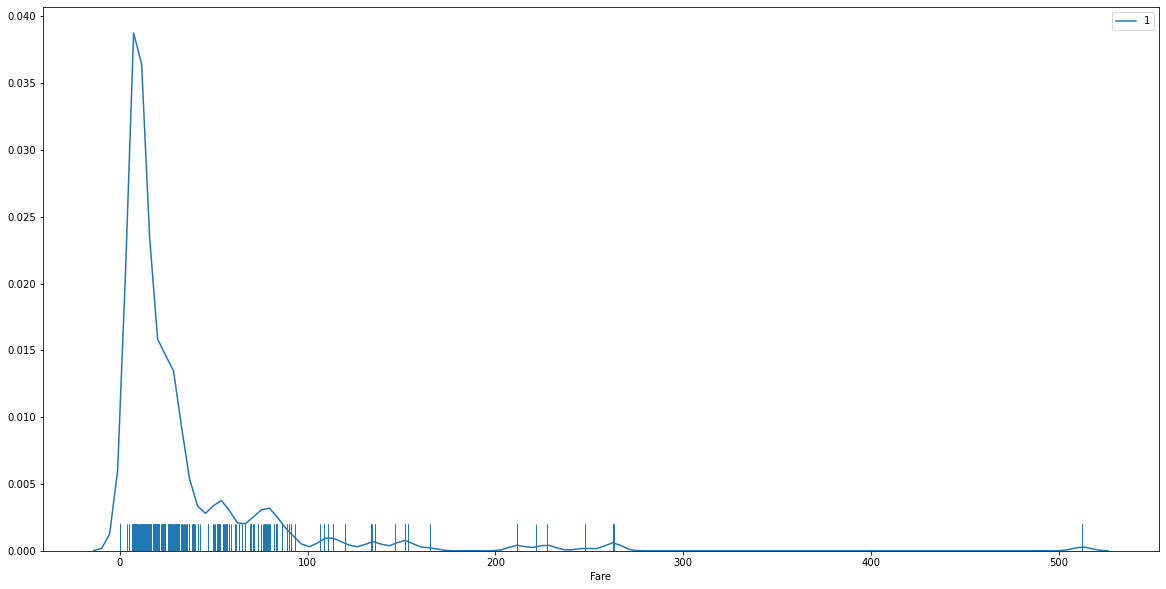

In [13]:
# sns.distplot(train['Fare'], hist=False)
plt.subplots(figsize=(20,10))
            #데이터     #히스토그렘   #레전드   #라인그래프  #양탄자그래프
sns.distplot(train.Fare, hist=False, label='1', kde=True, rug=True)  # kde : 라인 그래프 /  # rug : 양탄자 그래프

In [14]:
# Fare가 100 이하인 것들인 데이터만 선택 (100이상은 이상데이터)
train = train[train['Fare'] < 100]

In [15]:
print(train.shape)
train.head(10)

(838, 11)


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S


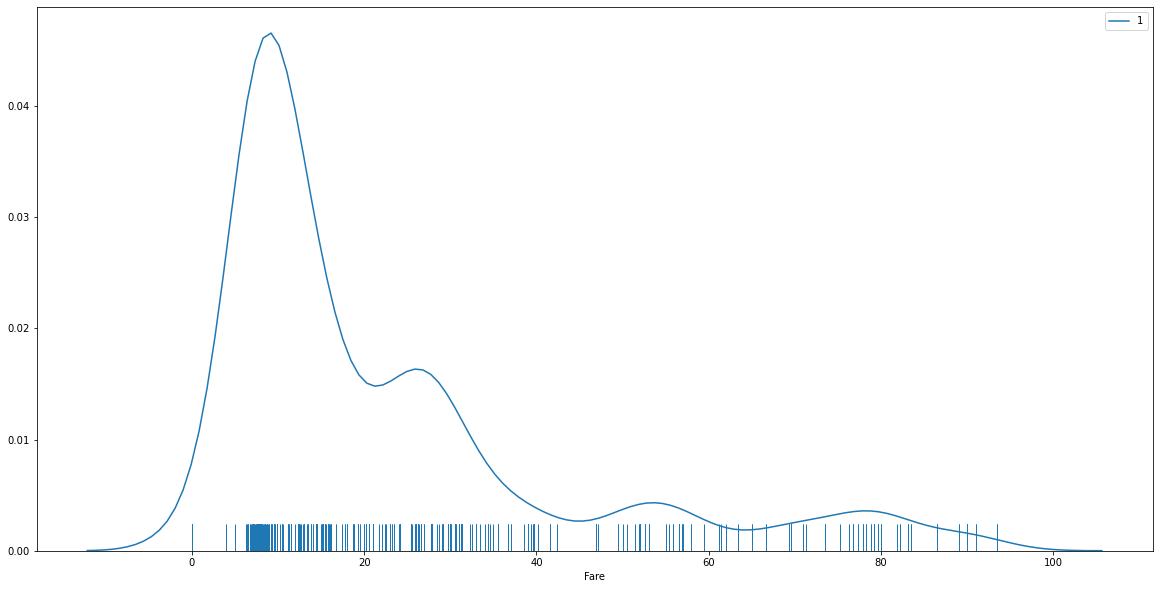

In [16]:
# sns.distplot(train['Fare'], hist=False)
plt.subplots(figsize=(20,10))
sns.distplot(train.Fare, hist=False, label='1', kde=True, rug=True)

In [17]:
# 생존자와 사망자 각각 분리
survived = train[train['Survived']==1]
dead = train[train['Survived']==0]

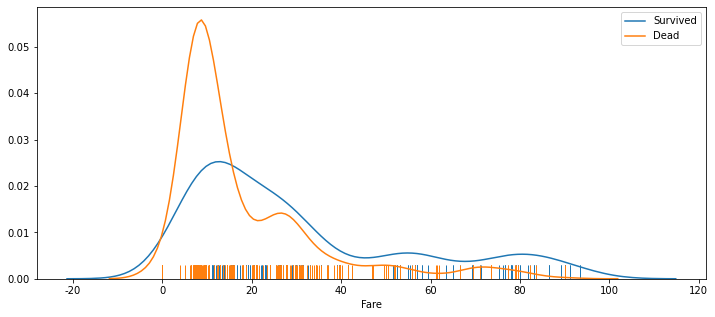

In [23]:
plt.subplots(figsize=(12,5))

sns.distplot(survived.Fare, hist=False, label='Survived', kde=True, rug=True)
sns.distplot(dead.Fare, hist=False, label='Dead', kde=True, rug=True)

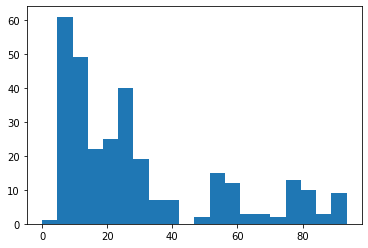

In [24]:
n, bins, patches = plt.hist(survived.Fare, bins=20)
plt.show()

### -> 요금이 저렴할수록 사망자가 많다(대략 Fare값 20 기준으로 생존/사망이 나뉘어진다)


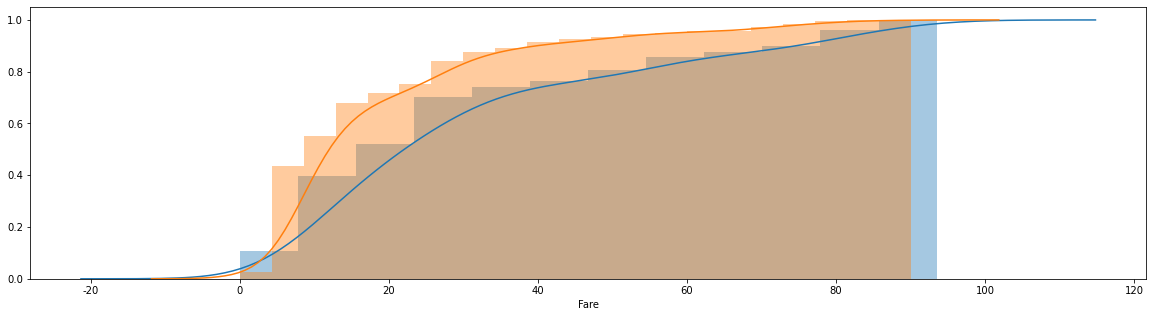

In [25]:
# 누적 그래프로 그려보자
plt.subplots(figsize=(20,5))

sns.distplot(survived.Fare,
              hist_kws = dict(cumulative=True),
              kde_kws = dict(cumulative=True))
sns.distplot(dead.Fare,
              hist_kws = dict(cumulative=True),
              kde_kws = dict(cumulative=True))

In [26]:
# Fare 원핫인코딩?
# 나이가 20살
train['inex'] = train['Fare']<=20
train['ex'] = train['Fare']>20

train[['inex', 'ex']].head()

,inex,ex
PassengerId,,
1,True,False
2,False,True
3,True,False
4,False,True
5,True,False


In [27]:
train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,inex,ex
PassengerId,,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,True,False
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,False,True
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,True,False
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,False,True
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,True,False


### (2) Age null값 채우기 / 범주화 -> 원핫인코딩

### Age를 유추할 독립변수 찾기 -> 히트맵 이용 -> Pclass가 가장 상관관계가 높다. Pclass별 평균값으로 Age를 넣자.

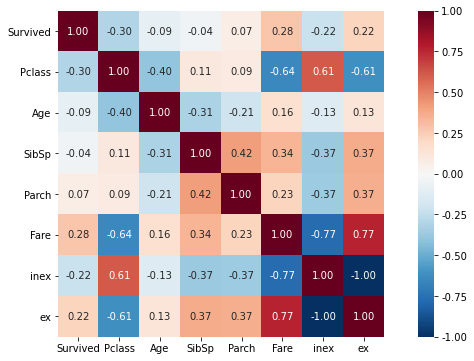

In [28]:
fig = plt.gcf()
fig.set_size_inches(12,6)

# 히트맵 그려보기
sns.heatmap(train.corr(), cmap='RdBu_r', square=True, cbar=True, annot=True, fmt=".2f")

In [29]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 838 entries, 1 to 891
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  838 non-null    int64  
 1   Pclass    838 non-null    int64  
 2   Name      838 non-null    object 
 3   Sex       838 non-null    object 
 4   Age       666 non-null    float64
 5   SibSp     838 non-null    int64  
 6   Parch     838 non-null    int64  
 7   Ticket    838 non-null    object 
 8   Fare      838 non-null    float64
 9   Cabin     161 non-null    object 
 10  Embarked  836 non-null    object 
 11  inex      838 non-null    bool   
 12  ex        838 non-null    bool   
dtypes: bool(2), float64(2), int64(4), object(5)
memory usage: 80.2+ KB


### Age의 null값을 채워보자 - ★groupby 사용 (Pclass 조건별로 평균값으로 채워넣기)

In [30]:
# (1) Pclass별 평균값 구하기 - groupby 이용 통계값 구하기
mean_by_P = train.groupby('Pclass')['Age'].mean()
mean_by_P

Pclass
1    40.416667
2    29.877630
3    25.140620
Name: Age, dtype: float64

In [31]:
mean_by_P[1]

40.416666666666664

In [32]:
# (2) Age null값에 Pclass별로 평균값 넣기 loc= 찾아넣기
train.loc[(train.Age.isnull())&(train.Pclass==1), 'Age'] = mean_by_P[1]
train.loc[(train.Age.isnull())&(train.Pclass==2), 'Age'] = mean_by_P[2]
train.loc[(train.Age.isnull())&(train.Pclass==3), 'Age'] = mean_by_P[3]

In [33]:
train.head(10)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,inex,ex
PassengerId,,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.00000,1,0,A/5 21171,7.2500,NaN,S,True,False
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.00000,1,0,PC 17599,71.2833,C85,C,False,True
3,1,3,"Heikkinen, Miss. Laina",female,26.00000,0,0,STON/O2. 3101282,7.9250,NaN,S,True,False
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.00000,1,0,113803,53.1000,C123,S,False,True
5,0,3,"Allen, Mr. William Henry",male,35.00000,0,0,373450,8.0500,NaN,S,True,False
6,0,3,"Moran, Mr. James",male,25.14062,0,0,330877,8.4583,NaN,Q,True,False
7,0,1,"McCarthy, Mr. Timothy J",male,54.00000,0,0,17463,51.8625,E46,S,False,True
8,0,3,"Palsson, Master. Gosta Leonard",male,2.00000,3,1,349909,21.0750,NaN,S,False,True
9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.00000,0,2,347742,11.1333,NaN,S,True,False


In [34]:
train.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age           0
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       677
Embarked      2
inex          0
ex            0
dtype: int64

### => Age null값 처리 완료

### 원핫인코딩을 위해 Age의 생존, 사망 각각의 distplot분포를 바탕으로 범주를 나눠보자

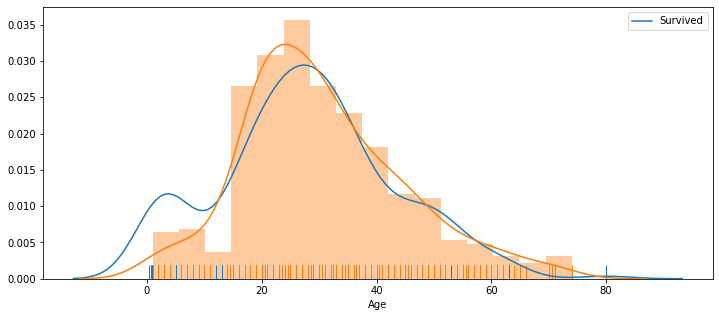

In [40]:
# sns.distplot(dead['Age'], hist=False,label='D',kde=True, rug=True)
plt.subplots(figsize=(12,5))

sns.distplot(survived.Age, hist=False, label='Survived', kde=True, rug=True)
sns.distplot(dead.Age, hist=True, label='Dead', kde=True, rug=True)

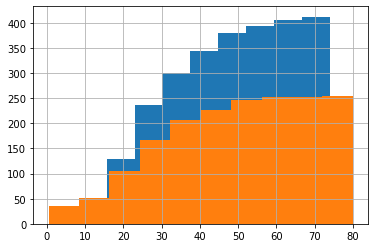

In [36]:
dead.Age.hist(cumulative='True')
survived.Age.hist(cumulative='True')

In [37]:
survived.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age          49
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       198
Embarked      2
dtype: int64

### => Age는 다음  범주로 나누면 될거같다.

- 16세 이하  : youth
- 16세~40세 : young
- 40세 이상  : old

In [41]:
train['youth'] = train['Age']<=16
train['young'] = (train['Age']>16) & (train['Age']<=40)
train['old'] = train['Age']>40

train[['youth', 'young','old']].head()

,youth,young,old
PassengerId,,,
1,False,True,False
2,False,True,False
3,False,True,False
4,False,True,False
5,False,True,False


In [42]:
train.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age           0
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       677
Embarked      2
inex          0
ex            0
youth         0
young         0
old           0
dtype: int64

=> Age 전처리 완료

## (3)Name 전처리 : 호칭 추출 -> 원핫인코딩

In [48]:
train['Name'][2].split(",")[1].split(".")[0].strip()

'Mrs'

In [43]:
# 이름을 넣으면 호칭을 알려주는 함수 정의
def get_title(name):
    return name.split(",")[1].split(".")[0].strip()

train['Title'] = train['Name'].apply(get_title)

In [49]:
train['Title']

PassengerId
1        Mr
2       Mrs
3      Miss
4       Mrs
5        Mr
       ... 
887     Rev
888    Miss
889    Miss
890      Mr
891      Mr
Name: Title, Length: 838, dtype: object

In [50]:
train.Title.unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'the Countess',
       'Jonkheer'], dtype=object)

In [51]:
train.Title.value_counts()

Mr              501
Miss            160
Mrs             113
Master           38
Rev               6
Dr                6
Mlle              2
Col               2
Major             2
the Countess      1
Capt              1
Sir               1
Don               1
Lady              1
Mme               1
Ms                1
Jonkheer          1
Name: Title, dtype: int64

In [52]:
# 호칭 이상치 제거 함수(핵심 호칭_Mr,Miss,Mrs,Master만 남기고, 나머지는 other)
def get_title2(name):
    title = name.split(",")[1].split(".")[0].strip()
    if title in ['Mr', 'Mrs', 'Miss', 'Master']:
        return title
    else :
        return 'other'

In [53]:
# train 셋의 'Title' 가져와서 호칭&other로 바꾸기
train['Title'] = train['Name'].apply(get_title2)

In [54]:
train.Title.unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'other'], dtype=object)

## Title별 Survived 생존율 -> Title과 Survived는 상관관계 있다.
### Title 원핫인코딩 실행

In [55]:
# Title 그룹을 index로 잡고, Survived 평균값을 구해보자
train.groupby('Title')['Survived'].mean()

Title
Master    0.552632
Miss      0.662500
Mr        0.153693
Mrs       0.778761
other     0.423077
Name: Survived, dtype: float64

In [56]:
# 승객마다 Title 원핫인코딩
train['Title_Mr'] = train['Title'] == 'Mr'
train['Title_Mrs'] = train['Title'] == 'Mrs'
train['Title_Miss'] = train['Title'] == 'Miss'
train['Title_Master'] = train['Title'] == 'Master'
train['Title_other'] = train['Title'] == 'other'

train[['Title_Mr', 'Title_Mrs', 'Title_Miss', 'Title_Master', 'Title_other']].head()

,Title_Mr,Title_Mrs,Title_Miss,Title_Master,Title_other
PassengerId,,,,,
1,True,False,False,False,False
2,False,True,False,False,False
3,False,False,True,False,False
4,False,True,False,False,False
5,True,False,False,False,False


## (4) 성별(Sex) 원핫인코딩

In [57]:
# 성별 별로 생존율 평균값 구하기
train.groupby('Sex')['Survived'].mean()

Sex
female    0.717857
male      0.182796
Name: Survived, dtype: float64

In [58]:
# 성별 원핫인코딩
train['Sex_M'] = train['Sex'] == 'male'
train['Sex_W'] = train['Sex'] == 'female'

train[['Sex_M', 'Sex_W']].head()

,Sex_M,Sex_W
PassengerId,,
1,True,False
2,False,True
3,False,True
4,False,True
5,True,False


In [59]:
# train.loc[train['Sex'] == 'male', 'Sex_revised'] = 0
# train.loc[train['Sex'] == 'female', 'Sex_revised'] = 1

# train['Sex_revised'].head()

In [60]:
train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,...,young,old,Title,Title_Mr,Title_Mrs,Title_Miss,Title_Master,Title_other,Sex_M,Sex_W
PassengerId,,,,,,,,,,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,...,True,False,Mr,True,False,False,False,False,True,False
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,...,True,False,Mrs,False,True,False,False,False,False,True
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,...,True,False,Miss,False,False,True,False,False,False,True
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,...,True,False,Mrs,False,True,False,False,False,False,True
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,...,True,False,Mr,True,False,False,False,False,True,False


## (5) Embarked 원핫인코딩

In [61]:
# EMbarked도 Survived와 상관관계가 있다.
train.groupby('Embarked')['Survived'].mean()

Embarked
C    0.517986
Q    0.389610
S    0.320968
Name: Survived, dtype: float64

In [62]:
train.loc[train.Embarked.isnull(), 'Embarked']

PassengerId
62     NaN
830    NaN
Name: Embarked, dtype: object

In [63]:
## Embarked의 null값 'C'로 채우기
train.loc[train.Embarked.isnull(), 'Embarked'] = 'C'

In [64]:
train.isnull().sum() 

Survived          0
Pclass            0
Name              0
Sex               0
Age               0
SibSp             0
Parch             0
Ticket            0
Fare              0
Cabin           677
Embarked          0
inex              0
ex                0
youth             0
young             0
old               0
Title             0
Title_Mr          0
Title_Mrs         0
Title_Miss        0
Title_Master      0
Title_other       0
Sex_M             0
Sex_W             0
dtype: int64

In [65]:
# Embarked 원핫인코딩
train['Embarked_C'] = train['Embarked'] == 'C'
train['Embarked_S'] = train['Embarked'] == 'S'
train['Embarked_Q'] = train['Embarked'] == 'Q'

train[['Embarked_C', 'Embarked_S', 'Embarked_Q']].head()

,Embarked_C,Embarked_S,Embarked_Q
PassengerId,,,
1,False,True,False
2,True,False,False
3,False,True,False
4,False,True,False
5,False,True,False


## (6) SibSp, Parch 전처리 -> FamilySize로 합친 후 원핫인코딩

In [66]:
train['FamilySize'] = train['SibSp'] + train['Parch']

In [67]:
# 가족 수 별 생존율 평균값 확인
train.groupby('FamilySize')['Survived'].mean()

FamilySize
0     0.287908
1     0.534247
2     0.569892
3     0.727273
4     0.076923
5     0.055556
6     0.333333
7     0.000000
10    0.000000
Name: Survived, dtype: float64

In [68]:
# 가족 수 별 class 지정 : Single, Nuclear, Big
train.loc[train['FamilySize'] <= 1, 'Family_cl'] = 'Single'
train.loc[(train['FamilySize'] >= 2) & (train['FamilySize'] < 5), 'Family_cl'] = 'Nuclear'
train.loc[train['FamilySize'] >= 5, 'Family_cl'] = 'Big'
train[['FamilySize', 'Family_cl']].head(10)

,FamilySize,Family_cl
PassengerId,,
1,1,Single
2,1,Single
3,0,Single
4,1,Single
5,0,Single
6,0,Single
7,0,Single
8,4,Nuclear
9,2,Nuclear


In [69]:
# 가족 class 별 원핫인코딩
train['Family_cl_S'] = train['Family_cl'] == 'Single'
train['Family_cl_N'] = train['Family_cl'] == 'Nuclear'
train['Family_cl_B'] = train['Family_cl'] == 'Big'

train[['Family_cl_S', 'Family_cl_N', 'Family_cl_B']].head()

,Family_cl_S,Family_cl_N,Family_cl_B
PassengerId,,,
1,True,False,False
2,True,False,False
3,True,False,False
4,True,False,False
5,True,False,False


## (7) Cabin(객실 번호)

In [70]:
train['Cabin'] = train['Cabin'].str[:1]

In [71]:
# 판다스의 pivot_table 사용해서 객실 번호별 생존율 확인
pd.pivot_table(data=train, index=['Pclass', 'Cabin'], values='Survived')

Survived
Pclass Cabin          
1      A      0.466667
       B      0.656250
       C      0.611111
       D      0.769231
       E      0.695652
       T      0.000000
2      D      0.750000
       E      0.750000
       F      0.875000
3      E      1.000000
       F      0.200000
       G      0.500000

In [76]:
# train['Cabin'][(train['Cabin'].isnull()) & (train['Pclass']==1)] 

In [77]:
train.loc[(train.Cabin.isnull())&(train.Pclass==1),  'Cabin'] = 'B'
train.loc[(train.Cabin.isnull())&(train.Pclass==2),  'Cabin'] = 'F'
train.loc[(train.Cabin.isnull())&(train.Pclass==3),  'Cabin'] = 'G'

In [78]:
train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,...,Sex_M,Sex_W,Embarked_C,Embarked_S,Embarked_Q,FamilySize,Family_cl,Family_cl_S,Family_cl_N,Family_cl_B
PassengerId,,,,,,,,,,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,G,...,True,False,False,True,False,1,Single,True,False,False
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,...,False,True,True,False,False,1,Single,True,False,False
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,G,...,False,True,False,True,False,0,Single,True,False,False
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C,...,False,True,False,True,False,1,Single,True,False,False
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,G,...,True,False,False,True,False,0,Single,True,False,False


In [79]:
train[train.Cabin.isnull()]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,...,Sex_M,Sex_W,Embarked_C,Embarked_S,Embarked_Q,FamilySize,Family_cl,Family_cl_S,Family_cl_N,Family_cl_B
PassengerId,,,,,,,,,,,,,,,,,,,,,


In [80]:
train.isnull().sum()

Survived        0
Pclass          0
Name            0
Sex             0
Age             0
SibSp           0
Parch           0
Ticket          0
Fare            0
Cabin           0
Embarked        0
inex            0
ex              0
youth           0
young           0
old             0
Title           0
Title_Mr        0
Title_Mrs       0
Title_Miss      0
Title_Master    0
Title_other     0
Sex_M           0
Sex_W           0
Embarked_C      0
Embarked_S      0
Embarked_Q      0
FamilySize      0
Family_cl       0
Family_cl_S     0
Family_cl_N     0
Family_cl_B     0
dtype: int64

## X_test 전처리

### test셋도 train셋과 똑같이 맞춰준다. 
(1) null값 채우기

In [61]:
test.isnull().sum()

Pclass        0
Name          0
Sex           0
Age          86
SibSp         0
Parch         0
Ticket        0
Fare          1
Cabin       327
Embarked      0
dtype: int64

In [62]:
# null값 채우기
# (1) Pclass별 평균값 구하기 - groupby 이용 통계값 구하기
mean_by_P = train.groupby('Pclass')['Age'].mean()

In [81]:
mean_by_P

Pclass
1    40.416667
2    29.877630
3    25.140620
Name: Age, dtype: float64

In [82]:
# (2) Age null값에 Pclass별로 평균값 넣기
test.loc[(test.Age.isnull())&(test.Pclass==1), 'Age'] = mean_by_P[1]
test.loc[(test.Age.isnull())&(test.Pclass==2), 'Age'] = mean_by_P[2]
test.loc[(test.Age.isnull())&(test.Pclass==3), 'Age'] = mean_by_P[3]

In [83]:
test.isnull().sum()

Pclass        0
Name          0
Sex           0
Age           0
SibSp         0
Parch         0
Ticket        0
Fare          1
Cabin       327
Embarked      0
dtype: int64

In [84]:
train['Fare'].mean()

22.411942482100205

In [85]:
test[test.Fare.isnull()]

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
1044,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S


In [86]:
test[test.Fare.isnull()==True]['Fare']

PassengerId
1044   NaN
Name: Fare, dtype: float64

### (★조건에 맞는 값을 넣는 것은 ★loc를 이용해라!)

In [87]:
test.loc[test.Fare.isnull()==True,'Fare'] = train['Fare'].mean()

In [88]:
test.isnull().sum()

Pclass        0
Name          0
Sex           0
Age           0
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       327
Embarked      0
dtype: int64

In [89]:
test.loc[(test.Cabin.isnull())&(test.Pclass==1),  'Cabin'] = 'B'
test.loc[(test.Cabin.isnull())&(test.Pclass==2),  'Cabin'] = 'F'
test.loc[(test.Cabin.isnull())&(test.Pclass==3),  'Cabin'] = 'G'

In [90]:
test.isnull().sum()

Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Cabin       0
Embarked    0
dtype: int64

In [91]:
test.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,G,Q
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,G,S
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,F,Q
895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,G,S
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,G,S


(2) 원핫 인코딩 해주기 : Age / Name(Title) / Sex / Embarked / SibSp&Parch

In [92]:
# Fare 원핫인코딩
test['inex'] = test['Fare']<=20
test['ex'] = test['Fare']>20

test[['inex', 'ex']].head()

,inex,ex
PassengerId,,
892,True,False
893,True,False
894,True,False
895,True,False
896,True,False


In [93]:
# 1. Age
test['youth'] = test['Age']<=16
test['young'] = (test['Age']>16) & (test['Age']<=40)
test['old'] = test['Age']>40

test[['youth', 'young','old']].head()

,youth,young,old
PassengerId,,,
892,False,True,False
893,False,False,True
894,False,False,True
895,False,True,False
896,False,True,False


In [94]:
# 2. Name
test['Title'] = test['Name'].apply(get_title2)

In [95]:
train.groupby('Title')['Survived'].mean()

Title
Master    0.552632
Miss      0.662500
Mr        0.153693
Mrs       0.778761
other     0.423077
Name: Survived, dtype: float64

In [96]:
test['Title_Mr'] = test['Title'] == 'Mr'
test['Title_Mrs'] = test['Title'] == 'Mrs'
test['Title_Miss'] = test['Title'] == 'Miss'
test['Title_Master'] = test['Title'] == 'Master'
test['Title_other'] = test['Title'] == 'other'

test[['Title_Mr', 'Title_Mrs', 'Title_Miss', 'Title_Master', 'Title_other']].head()

,Title_Mr,Title_Mrs,Title_Miss,Title_Master,Title_other
PassengerId,,,,,
892,True,False,False,False,False
893,False,True,False,False,False
894,True,False,False,False,False
895,True,False,False,False,False
896,False,True,False,False,False


In [97]:
# 3. Sex
test['Sex_M'] = test['Sex'] == 'male'
test['Sex_W'] = test['Sex'] == 'female'

test[['Sex_M', 'Sex_W']].head()

,Sex_M,Sex_W
PassengerId,,
892,True,False
893,False,True
894,True,False
895,True,False
896,False,True


In [98]:
# 4. Sex
# test.loc[test['Sex'] == 'male', 'Sex_revised'] = 0
# test.loc[test['Sex'] == 'female', 'Sex_revised'] = 1
# test['Sex_revised'].head()

In [99]:
# 5. Embarked
test['Embarked_C'] = test['Embarked'] == 'C'
test['Embarked_S'] = test['Embarked'] == 'S'
test['Embarked_Q'] = test['Embarked'] == 'Q'

test[['Embarked_C', 'Embarked_S', 'Embarked_Q']].head()

,Embarked_C,Embarked_S,Embarked_Q
PassengerId,,,
892,False,False,True
893,False,True,False
894,False,False,True
895,False,True,False
896,False,True,False


In [100]:
# 6. SibSp, Parch
test['FamilySize'] = test['SibSp'] + test['Parch']

In [101]:
test.loc[test['FamilySize']<=1, 'Family_cl'] = 'Single'
test.loc[(test['FamilySize']>=2)&(test['FamilySize']<5), 'Family_cl'] = 'Nuclear'
test.loc[test['FamilySize']>=5, 'Family_cl'] = 'Big'

In [102]:
test['Family_cl_S'] = test['Family_cl'] == 'Single'
test['Family_cl_N'] = test['Family_cl'] == 'Nuclear'
test['Family_cl_B'] = test['Family_cl'] == 'Big'

test[['Family_cl_S', 'Family_cl_N', 'Family_cl_B']].head()

,Family_cl_S,Family_cl_N,Family_cl_B
PassengerId,,,
892,True,False,False
893,True,False,False
894,True,False,False
895,True,False,False
896,False,True,False


In [103]:
test.isnull().sum()

Pclass          0
Name            0
Sex             0
Age             0
SibSp           0
Parch           0
Ticket          0
Fare            0
Cabin           0
Embarked        0
inex            0
ex              0
youth           0
young           0
old             0
Title           0
Title_Mr        0
Title_Mrs       0
Title_Miss      0
Title_Master    0
Title_other     0
Sex_M           0
Sex_W           0
Embarked_C      0
Embarked_S      0
Embarked_Q      0
FamilySize      0
Family_cl       0
Family_cl_S     0
Family_cl_N     0
Family_cl_B     0
dtype: int64

In [85]:
test.shape

(418, 31)

In [104]:
train.shape

(838, 32)

# 학습1: 랜덤포레스트

### 피쳐 결정 & 데이터 나누기

In [105]:
train.shape

(838, 32)

In [106]:
train.columns.unique()

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked', 'inex', 'ex', 'youth', 'young', 'old',
       'Title', 'Title_Mr', 'Title_Mrs', 'Title_Miss', 'Title_Master',
       'Title_other', 'Sex_M', 'Sex_W', 'Embarked_C', 'Embarked_S',
       'Embarked_Q', 'FamilySize', 'Family_cl', 'Family_cl_S', 'Family_cl_N',
       'Family_cl_B'],
      dtype='object')

In [107]:
feature_names = [
                'youth', 'young','old',                                                            # 나이                 
                'Title_Mr', 'Title_Mrs', 'Title_Miss', 'Title_Master', 'Title_other',     # 결혼, 성별
                'Sex_M', 'Sex_W',                                                         # 성별
                'Embarked_C', 'Embarked_S', 'Embarked_Q',                  
                'Family_cl_S', 'Family_cl_N','Family_cl_B',                               # 가족수                 
                'Pclass',                                                                 # 계급                
                'inex', 'ex',                                                   # Fare
#                 'Cabin'
                ]

In [108]:
X_train= train[feature_names]

In [109]:
X_test= test[feature_names]
test.shape

(418, 31)

In [110]:
#정답지
y_train = train['Survived']
print(y_train.shape)

(838,)


In [111]:
train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,...,Sex_M,Sex_W,Embarked_C,Embarked_S,Embarked_Q,FamilySize,Family_cl,Family_cl_S,Family_cl_N,Family_cl_B
PassengerId,,,,,,,,,,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,G,...,True,False,False,True,False,1,Single,True,False,False
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,...,False,True,True,False,False,1,Single,True,False,False
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,G,...,False,True,False,True,False,0,Single,True,False,False
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C,...,False,True,False,True,False,1,Single,True,False,False
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,G,...,True,False,False,True,False,0,Single,True,False,False


### 모델: 랜덤포레스트

In [132]:
#사이킷런
from sklearn.ensemble import RandomForestClassifier

In [133]:
# 랜덤포레스트 분류기를 사용
forest = RandomForestClassifier(n_estimators = 100, n_jobs = -1, random_state=2018)
forest                #분류           

# <RF 파라미터 설명>
# n_estimators: (가용한 시간, 메모리 안에서) 숫자 클수록 Score up.(더 많은 트리->과대적합 down)
# n_jobs = -1 : cpu core를 모두 사용하라(2 : 2개의 core를 사용해라)
# random_state=2018 : 랜덤포레스트 돌릴 때마다 항상 같은 score를 가지도록.(파라미터 튜닝 위해)

RandomForestClassifier(n_jobs=-1, random_state=2018)

### fit(학습)

In [141]:
# feature 행렬 데이터와 sentiment 벡터 데이터를 넣어서 랜덤 포레스트 학습을 시킨다.
%time forest = forest.fit(X_train, y_train)

Wall time: 118 ms


In [148]:
# 학습시킨 데이터를 Cross Validation해서 스코어 내기(ROC 커브 활용해서)
from sklearn.model_selection import cross_val_score
%time score = np.mean(cross_val_score(forest, X_train, y_train, cv=10, scoring='roc_auc'))

# 예측 정확도는?
score
#자체 검증

Wall time: 878 ms


0.8525483720685587

# 예측

In [149]:
# 테스트 데이터를 넣고 sentiment를 예측한다. 앞 10개만 보자.
y_pred = forest.predict(X_test)
y_pred[:10]

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0], dtype=int64)

In [144]:
submit = pd.read_csv("data_titanic/gender_submission.csv", index_col='PassengerId')

In [145]:
print(X_test.shape)
print(y_pred.shape)
print(submit.shape)

(418, 19)
(418,)
(418, 1)


In [146]:
submit['Survived'] = forest.predict(X_test)

In [147]:
submit.to_csv('data_titanic/submit_{0:4f}.csv'.format(score))